In [1]:
import pandas as pd
import numpy as np
import folium as fl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# conda install folium

# PROBLEM 1

## Question 1

What is the distribution of attribute income among different education levels? Does it show that
highly educated adults have higher incomes? Use proper data handling for the education attribute.
Write the R or Python code in the box below.

In [300]:
df = pd.read_csv("census_data/census_income_data.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [163]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [164]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

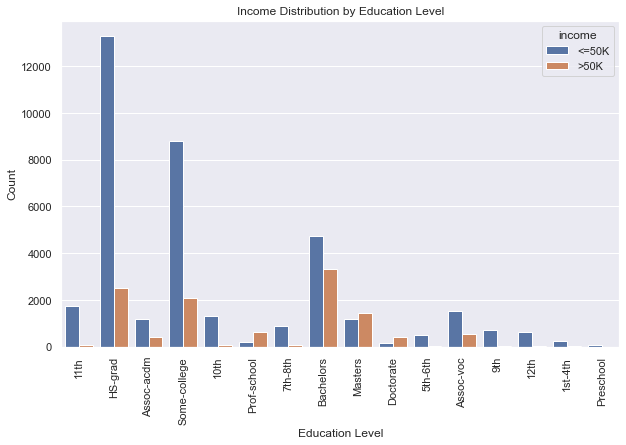

In [293]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='income', data=df)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=90)
plt.show()

We notice from the graph that the highly educated people have more chances of having higher salaries than others. 
Example for Doctorate level, the percentage of people earning more than 50K income is larger. More than 50 Percent of people who did Masters, Doctorate and Prof-school are earning more than income. 

## Question 2

List and show the distribution of occupations from which adults earned more than 50K even after
working less than or equal to 40 hours per week? What kind of education level does it require? Write
the R or Python code in the box below

In [166]:
list_of_values = [">50K",">=50K"]
df2 = df[df["income"].isin(list_of_values)]
df2 = df2[df2["hours-per-week"]<=40]
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
30,46,State-gov,106444,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,7688,0,38,United-States,>50K


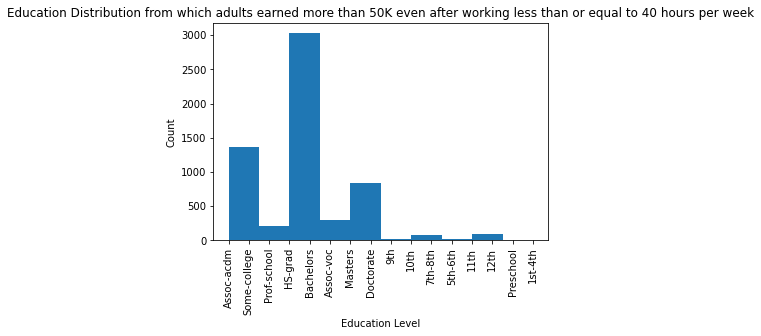

In [92]:
plt.hist(df2['education'])
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Distribution from which adults earned more than 50K even after working less than or equal to 40 hours per week")
plt.xticks(rotation=90)
plt.show()

People with bachelor degree more likely earn more than 50k anf work less than 40 hours.

In [167]:
# Count the number of occurrences of each occupation
occ = df2["occupation"].value_counts().sort_values(ascending=False)
occ.head(11)

Prof-specialty       1429
Exec-managerial      1149
Craft-repair          812
Sales                 577
Adm-clerical          567
Tech-support          296
Machine-op-inspct     247
Transport-moving      202
?                     195
Protective-serv       179
Other-service         138
Name: occupation, dtype: int64

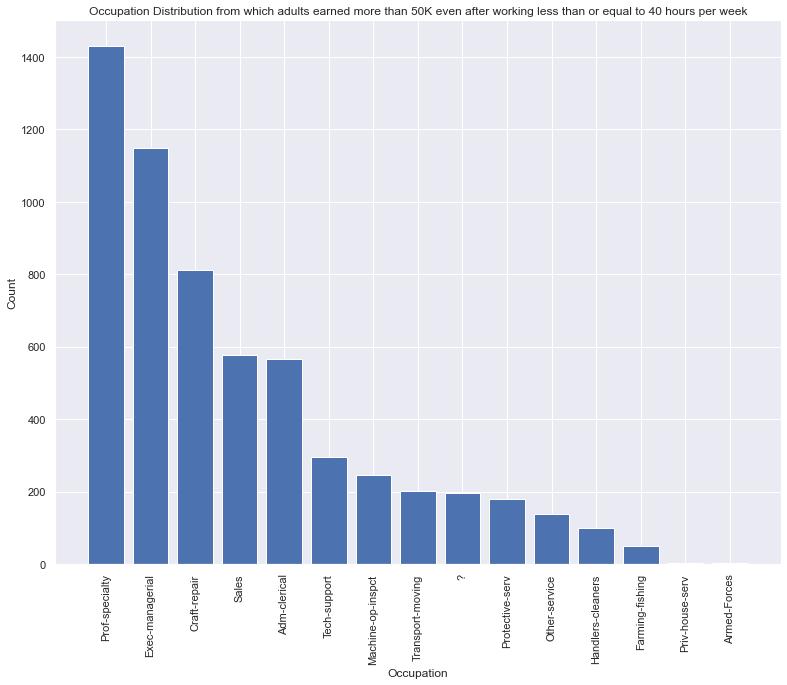

In [168]:
# Occupation Distribution from which adults earned more than 50K 
# even after working less than or equal to 40 hours per week

# Plot the bar plot
plt.bar(occ.index, occ.values)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation Distribution from which adults earned more than 50K even after working less than or equal to 40 hours per week")
plt.xticks(rotation=90)
plt.show()

Foloowing are the top 10 occupation where Occupation Distribution from which adults earned more than 50K 
even after working less than or equal to 40 hours per week
Prof-specialty       1429
Exec-managerial      1149
Craft-repair          812
Sales                 577
Adm-clerical          567
Tech-support          296
Machine-op-inspct     247
Transport-moving      202
Protective-serv       179
Other-service         138

## Question 3

Male adults earned more than female adults during the time the census was taken”. Can you prove
this statement with the given data? Why or why not? Describe and illustrate. Write the R or Python
code in the box below.

In [122]:
num_gender = df['gender'].value_counts()
num_gender

Male      32650
Female    16192
Name: gender, dtype: int64

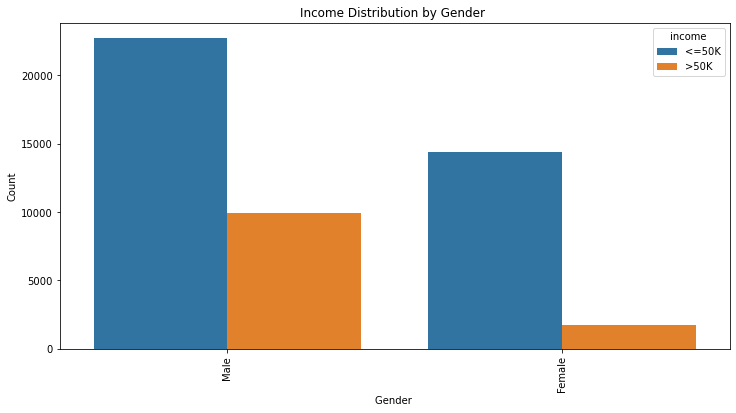

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender', hue='income', data=df)
plt.xlabel("Gender ")
plt.ylabel("Count")
plt.title("Income Distribution by Gender ")
plt.xticks(rotation=90)
plt.show()

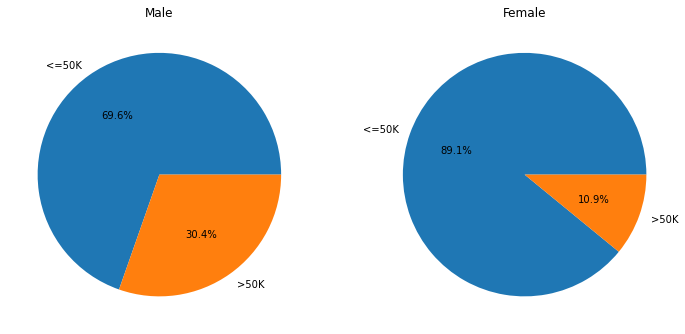

In [119]:
# To make more sense of the data, we plot a pie chart
# Calculate the percentage of males and females with different income levels
df_gender_income = df.groupby(['gender', 'income']).size().reset_index(name='counts')
df_gender_income['percentage'] = 100 * df_gender_income['counts'] / df_gender_income['counts'].sum()

# Plot the pie chart for males and females with different income levels
plt.figure(figsize=(12,6))
for i, gender in enumerate(['Male', 'Female']):
    plt.subplot(1, 2, i+1)
    plt.pie(df_gender_income[df_gender_income['gender'] == gender]['percentage'], labels=df_gender_income[df_gender_income['gender'] == gender]['income'], autopct='%1.1f%%')
    plt.title(gender)

plt.show()

The histogram gives us the distribution of income with respect to genders, but the number of males and females are different (Male    -  32650, Female -   16192), placing it on a relative scale. 
So to find out if Male adults earned more than female adults during the time the census was taken, We plot a pie chart depicting the percentage of each gender correspongin to different income group. We notice that Females adults indeed earn less than male adults during the time census was conducted, with only 10.9% of the females esrning more tahn 50K versus 30.4% men earning more than 50K.

## Question 4

Use box plots to show and describe the relation of categorical attributes with the target attribute
income. Note: As income is a categorical attribute, be mindful about how you can display the
relations in a compact manner

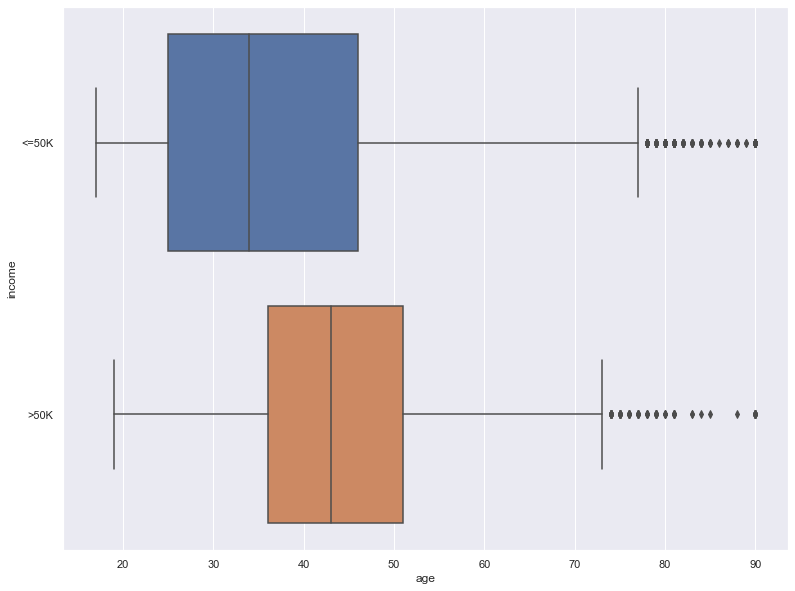

In [302]:
# le = LabelEncoder()
# # Select the columns you want to encode
# cols = df.columns

# # Apply the encoding to multiple columns
# df[cols] = df[cols].apply(lambda col: le.fit_transform(col))

# box_cols = df.columns.tolist()[:-2]
box_cols = ['age']

for i in box_cols:
  sns.boxplot(x=df[i],y=df.income)
  plt.show()

# PROBLEM 2

In [3]:
df_crime =  pd.read_csv('crime_data/crime.csv', encoding = 'windows-1252')
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df_codes =  pd.read_csv('crime_data/offense_codes.csv', encoding = 'windows-1252')
df_codes = df_codes.rename(columns = {'CODE':'OFFENSE_CODE'})
df_codes.head()

,OFFENSE_CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [5]:
df_crime.shape, df_codes.shape

((319073, 17), (576, 2))

In [6]:
df_crime.isna().sum() , df_codes.isna().sum()

(INCIDENT_NUMBER             0
 OFFENSE_CODE                0
 OFFENSE_CODE_GROUP          0
 OFFENSE_DESCRIPTION         0
 DISTRICT                 1765
 REPORTING_AREA              0
 SHOOTING               318054
 OCCURRED_ON_DATE            0
 YEAR                        0
 MONTH                       0
 DAY_OF_WEEK                 0
 HOUR                        0
 UCR_PART                   90
 STREET                  10871
 Lat                     19999
 Long                    19999
 Location                    0
 dtype: int64,
 OFFENSE_CODE    0
 NAME            0
 dtype: int64)

In [7]:
df_crime['SHOOTING'].value_counts()


Y    1019
Name: SHOOTING, dtype: int64

In [8]:
df_crime['OCCURRED_ON_DATE'] = pd.to_datetime(df_crime['OCCURRED_ON_DATE'])

In [9]:
df_crime[df_crime['SHOOTING'].notna()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317370,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317371,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317567,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"


In [10]:
df_crime.shape

(319073, 17)

In [11]:
# shooting column has values Nan which seems to be cases where shooting wasn't involved. So repolace Nan with N
df_crime['SHOOTING'] = df_crime['SHOOTING'].fillna('N')

In [12]:
df_merged = df_crime.merge(df_codes.drop_duplicates(subset=['OFFENSE_CODE']), how='left') 
df_merged.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NAME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY ALL OTHERS
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",VANDALISM
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",TOWED MOTOR VEHICLE
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",INVESTIGATE PROPERTY
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",INVESTIGATE PROPERTY


In [13]:
df_merged.shape

(319073, 18)

## Question 1.

In [14]:
# Count the number of occurrences of each offense type
offense_counts = df_merged["NAME"].value_counts().sort_values(ascending=False)
offense_counts.head(10)

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18754
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15154
ASSAULT SIMPLE - BATTERY                 14799
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9074
THREATS TO DO BODILY HARM                 9042
Name: NAME, dtype: int64

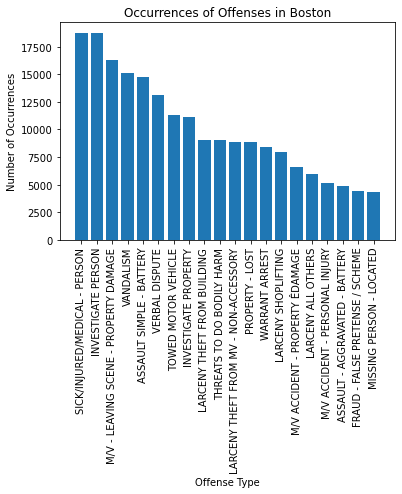

In [15]:
# Siince there are around 150ntypes of offences, I've plotted most frequently occoring offenses
# Plot the bar plot
plt.bar(offense_counts.index[:20], offense_counts.values[:20])
plt.xlabel("Offense Type")
plt.ylabel("Number of Occurrences")
plt.title("Occurrences of Offenses in Boston")
plt.xticks(rotation=90)
plt.show()

Most commom type of crimes that Boston police has to handle is Sick/Injured/Medical Person among many other frequent offenses like INVESTIGATE PERSON, M/V - LEAVING SCENE - PROPERTY DAMAGE, VANDALISM, ASSAULT SIMPLE - BATTERY , VERBAL DISPUTE etc.


## Question 2.

In [16]:
# find all kinds of M/V accidents
accidents = df_codes.loc[df_codes['NAME'].str.contains("M/V ACCIDENT")]
accidents

,OFFENSE_CODE,NAME
7,3810,M/V ACCIDENT - INVOLVING ÊBICYCLE - INJURY
8,3801,M/V ACCIDENT - OTHER
9,3807,M/V ACCIDENT - OTHER CITY VEHICLE
10,3803,M/V ACCIDENT - PERSONAL INJURY
11,3805,M/V ACCIDENT - POLICE VEHICLE
12,3802,M/V ACCIDENT - PROPERTY ÊDAMAGE
176,3811,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY
177,3820,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
178,3821,M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY
441,3712,M/V ACCIDENT - OTHER


In [17]:
df_accidents = df_merged.loc[df_merged['OFFENSE_CODE'].isin(accidents['OFFENSE_CODE'])]
df_accidents.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NAME
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,N,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
21,I182070911,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,N,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)",M/V ACCIDENT - OTHER
23,I182070909,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,N,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)",M/V ACCIDENT - PERSONAL INJURY
44,I182070886,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,N,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)",M/V ACCIDENT - PROPERTY ÊDAMAGE
46,I182070882,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,901,N,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)",M/V ACCIDENT - OTHER


In [18]:
# Top 10 Streets with M/V accidents
mv_accident_count = df_accidents['STREET'].value_counts()
mv_accident_count[:10]

BLUE HILL AVE        673
WASHINGTON ST        607
DORCHESTER AVE       430
COMMONWEALTH AVE     370
CENTRE ST            327
COLUMBIA RD          320
HYDE PARK AVE        317
MASSACHUSETTS AVE    317
CAMBRIDGE ST         244
COLUMBUS AVE         230
Name: STREET, dtype: int64

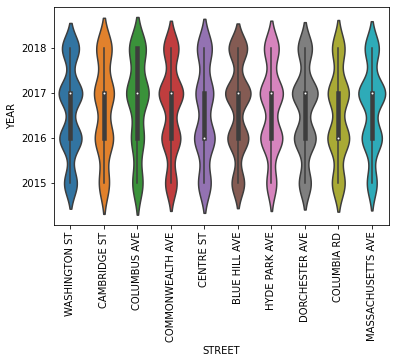

In [39]:
top_streets = df_accidents[df_accidents['STREET'].isin(df_accidents['STREET'].value_counts().head(10).index)]

# Plot the violin plot
sns.violinplot(x='STREET', y='YEAR', data=top_streets)
plt.xticks(rotation=90)
# Show the plot
plt.show()

Most number of M/V accidents happened at the Blue Hill Ave - 673, followed by 607 in Washington St.


## Question 3.

In [ ]:
# for some crimes, locations are not mentioned
print(df_merged['Lat'].isna().sum(), df_merged['Long'].isna().sum())


In [ ]:
# Drop the rows, since imputing will result in inaccuracies 
df_merged = df_merged.dropna(subset=['Lat', 'Long'])

In [ ]:
# Aggregate the crime data by sector
sector_groups = df_merged.groupby("DISTRICT")
sector_crime_counts = neighborhood_groups["DISTRICT"].count()

In [ ]:


# Create a folium map centered on Boston
boston_map = fl.Map(location= [42.290196,-71.071590], zoom_start=12)

# Add markers for each neighborhood with the aggregated crime count
for sector, crime_count in sector_crime_counts.items():
    fl.CircleMarker(
        location=[sector_groups.get_group(sector)["Lat"].mean(), sector_groups.get_group(sector)["Long"].mean()],
        # set the marker size based on the crime count
        radius=crime_count/2000, 
        fill = True,
        tooltip=f"{sector}: {crime_count} crimes" 
    ).add_to(boston_map)

boston_map

In [ ]:
boston_map.save("boston_map.html")

## Question 4

In [51]:
# Count the number of occurrences WRT HOUR
hour_counts = df_merged["HOUR"].value_counts().sort_values(ascending=False)
# Count the number of occurrences WRT MONTH
month_counts = df_merged["MONTH"].value_counts().sort_values(ascending=False)
# Count the number of occurrences WRT Day
day_counts = df_merged["DAY_OF_WEEK"].value_counts().sort_values(ascending=False)


Text(0.5, 1.0, 'Number of Crimes by Day of Week')

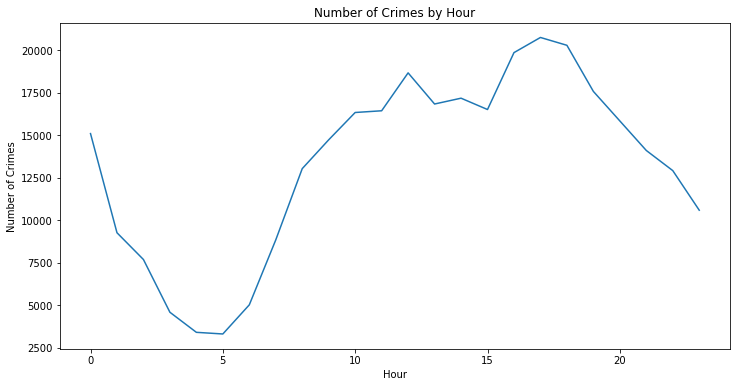

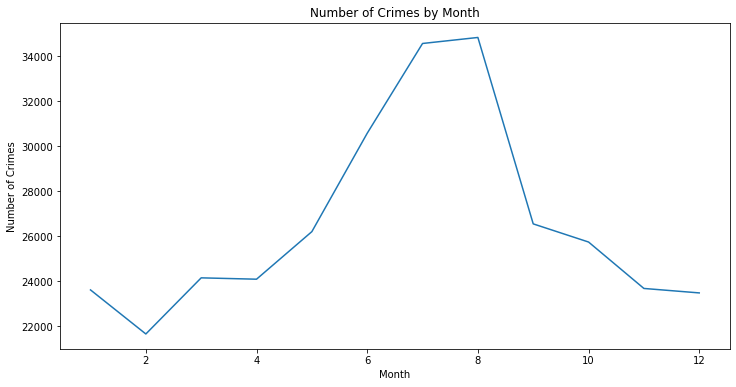

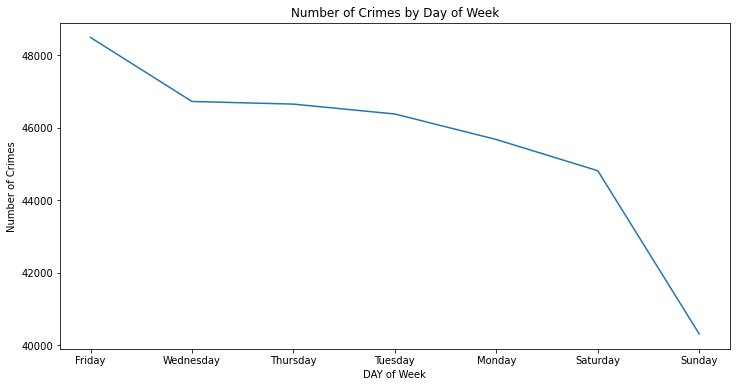

In [52]:

# Plot the number of crimes by hour
plt.figure(figsize=(12,6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes by Hour")

# Plot the number of crimes by Month
plt.figure(figsize=(12,6))
sns.lineplot(x=month_counts.index, y=month_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes by Month")


# Plot the number of crimes by Day
plt.figure(figsize=(12,6))
sns.lineplot(x=day_counts.index, y=day_counts.values)
plt.xlabel("DAY of Week")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes by Day of Week")



# PROBLEM 3

In [275]:
df_drugs = pd.read_csv("drug_data/drug_consumption_data.csv")
df_drugs.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [276]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

In [277]:
# drop ID field
df_drugs = df_drugs.drop('ID', axis=1)

In [278]:
df_drugs.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [279]:
def convert_ratings(x):
  ratings = {"CL0":0,"CL1":1,"CL2":2,"CL3":3,"CL4":4,"CL5":5,"CL6":6}
  if x in ratings.keys():
    return ratings[x]

drugcols = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA']
for i in drugcols:
  df_drugs[i] = df_drugs[i].apply(lambda x:convert_ratings(x)) 



In [280]:
df_drugs.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,0


## Question 1

For 5 drugs of your choice, show the distribution of the ratings (CL0 to CL6) in a single image using
box plots. Do you find any relations of the drugs you have chosen with the ratings? Which drug is
being used the most in recent times?

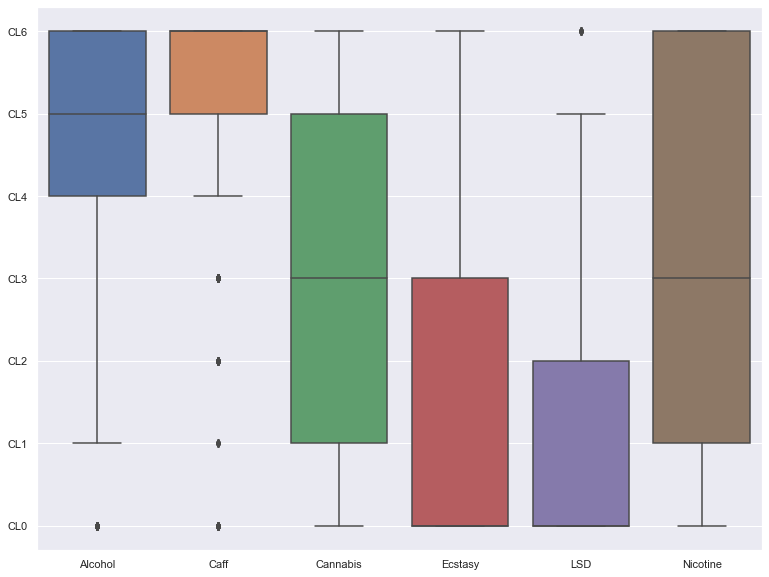

In [281]:
drugs = ['Alcohol',
        'Caff', 'Cannabis', 
       'Ecstasy',  'LSD', 
       'Nicotine']
sns.boxplot(data = df_drugs[drugs])
plt.yticks(ticks = [0,1,2,3,4,5,6],labels=["CL0","CL1","CL2","CL3","CL4","CL5","CL6"])
plt.show()

We notice that Caff has been used the most in recent times, median rating being C6 and majority of the data being in CL5-CL6. Nicotine is being used fronm quite a long time from CL1 to CL6 with median data on CL3. 
Caff, LSD, Ecstacy are skewed. Caff towards CL6 and Ecstacy and LSD towards CL0.
Cannabis is also used majorly from CL1 to CL5, ie, ranging from use since a decade till last week. 



## Question 2

Mine this data to find out if there is a preferred list of drugs for females? Do females take less illegal
drugs/no drugs at all than males? Mention your assumption about which drugs you are considering
illegal. Describe your answers with suitable visualizations.

In [282]:
df_drug_f =  df_drugs[df_drugs['Gender']=='F']
df_drug_f.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,0
7,35-44,F,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,0,0,0,0,0,6,0,0
9,25-34,F,University degree,UK,White,-1.05308,0.80523,-1.11902,-0.76096,1.81175,...,0,0,0,0,0,0,0,2,0,1


In [283]:
df_total_f = (~(df_drug_f[drugcols] == 0)).sum().sort_values(ascending=False)
df_total_f



Alcohol      926
Caff         924
Choc         924
Nicotine     666
Cannabis     646
Benzos       381
Amphet       346
Coke         346
Mushrooms    334
Ecstasy      328
LSD          288
Legalh       246
Amyl         229
VSA          161
Meth         153
Ketamine     126
Heroin        97
Crack         91
Semer          5
dtype: int64

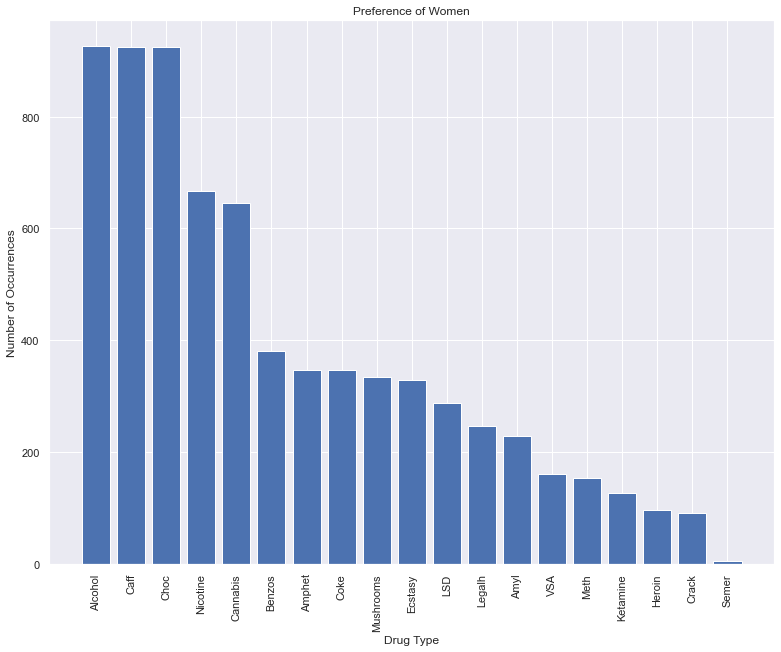

In [284]:
# Plot the bar plot
plt.bar(df_total_f.index, df_total_f.values)
plt.xlabel("Drug Type")
plt.ylabel("Number of Occurrences")
plt.title("Preference of Women")
plt.xticks(rotation=90)
plt.show()

Alcohol, Caff, Choc seems to be the most popular choice for female, followed by Nicotine, Cannabis among rest of drugs.

We assume that drugs like alcohol, nicotine, caff, choc, amphet are legal. ALthough other drugs may also be legal depending on the country or state

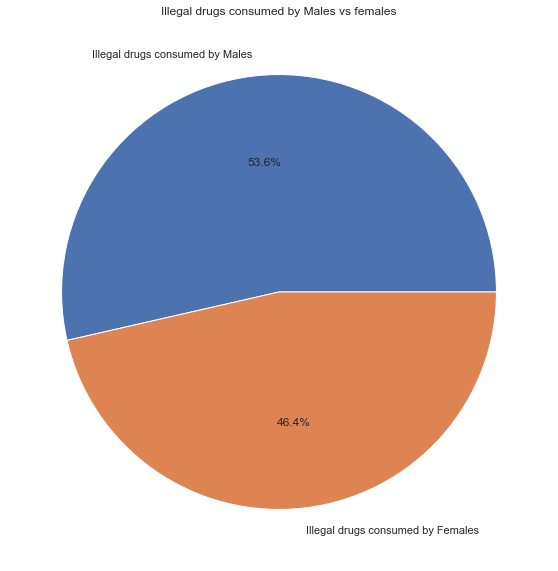

In [285]:
illegal_drugs = [ 'Amyl', 'Benzos', 'Cannabis',  'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA']
# percemtage of females using iklegal drugs
df_illegal_f = ((~(df_drug_f[illegal_drugs] == 0)).sum().sum()/df_total_f.sum())*100
df_drug_m =  df_drugs[df_drugs['Gender']=='M']
df_total_m = (~(df_drug_m[drugcols] == 0)).sum().sort_values(ascending=False)
df_illegal_m = ((~(df_drug_m[illegal_drugs] == 0)).sum().sum()/df_total_m.sum())*100
plt.pie([df_illegal_m, df_illegal_f], labels=['Illegal drugs consumed by Males','Illegal drugs consumed by Females'], autopct='%1.1f%%')
plt.title('Illegal drugs consumed by Males vs females')

plt.show()

Females relatitively take less illegal drugs when comapred to men who take around 7.2% more than females.

## Question 3

Visualize the correlation map among the drugs and the 12 personality measurement attributes. Do
you find any significant correlation among the drugs?

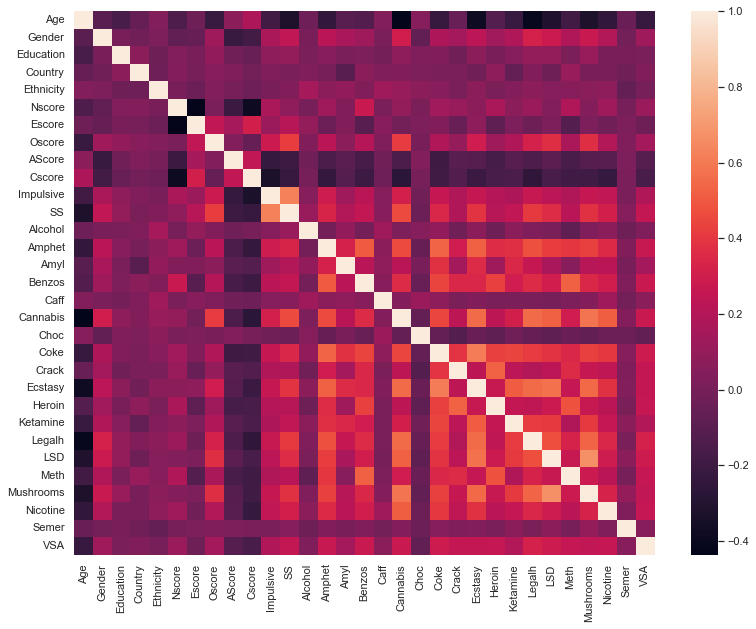

In [286]:

le = LabelEncoder()

# Select the columns you want to encode
cols = ['Age', 'Education','Country','Gender','Ethnicity']

# Apply the encoding to multiple columns
df_drugs[cols] = df_drugs[cols].apply(lambda col: le.fit_transform(col))


corr = df_drugs.corr()

# Plot the heatmap
sns.heatmap(corr)

# Show the plot
plt.show()

Indirect correlation between age and most of drugs whereas direct correlation appears between gender, and most of the drugs. C Score looks to have a slight negative correlation with the drugs. Rest of the personality attributes have a 0 to low positive correlation with the drugs.